# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Junwei He     
- Nombre de alumno 2: Sofia Chavez

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/sofiachavezb/LabProgramacionMDS)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. La diferencia entre datos de entrenamiento y validación es que los primeros se usan para entrenar el modelo y los segundos para obtener una medida o noción de la calidad de los resultados que entrega, lo que se utiliza para ajustar hiperparámetros o seleccionar modelos. Se utilizan conjuntos de datos diferentes puesto que evaluar sobre el conjunto de entrenamiento puede resultar en overfitting.

    Por ello, los datos de validación deben ser datos nuevos para el modelo, es decir, deben ser conjuntos de datos excluyentes. Sin embargo, si bien ofrecen una perspectiva de la calidad de los resultados, al ser utilizados para seleccionar modelos pueden diferir de los resultados reales que se obtendrían para datos completamente nuevos, para lo cual se puede utlizar un tercer conjunto de datos, denominados datos de testing, con el que se evalúa el modelo final, sin tomar decisiones sobre sus resultados.

2. El problema principal es en sí mismo la falta de etiquetas. Si bien se pueden utilizar métodos como clustering e intentar utilizar conocimiento experto o analizar los datos para definir hiperparámetros (por ejemplo la cantidad de clusters), la no disposición de etiquetas dificulta la comparación entre resultados o la validación de estos. Se pueden usar criterios como AIC, BIC, analizar la cohesión intra clusters y la separación entre ellos, pero es más complejo y puede ser menos claro que obtener métricas como accuracy, recall o f1 en clasificación supervisada. También se pueden intentar visualizar las clases resultantes, pero eso se dificulta a medida que aumenta la cantidad de dimensiones o los tipos de datos con los que se trabaja. En resumen, cuesta verificar que la clasificación resultante se condiga con las clases "reales", puede requerir tomar más decisiones manualmente.

3. La matriz de confusión es un tipo de visualización que muestra los resultados de clasificación de un conjunto de datos, especificando la cantidad de instancias cada clase real (etiquetada) que fueron clasificadas como cada clase (output) por el modelo . Se puede usar tanto para clasificación binaria como multiclase y ayuda a entender cuál es la proporción de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. En case de clasificación multiclase también muestra a qué clase fueron asociados los datos mal clasificados. Usualmente se acompañan de escalas de colores y pueden mostrar cantidades absolutas como relativas.

4.

* Accuracy  
    El accuracy se define como la proporción de predicciones correctas (verdaderos positivos + verdaderos negativos) sobre el total de predicciones realizadas. La fórmula es:  

    $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

    
    Esta métrica es la más básica para evaluar cuán correcta es una clasificación, pero funciona mal en clases desbalanceadas y pondera de la misma forma falsos positivos como falsos negativos.

* Precision
    La precision es proporción de verdaderos positivos sobre todas las predicciones positivas. La fórmula es:  

    $$\text{Precision} = \frac{TP}{TP + FP}$$

    Indica cuántos de los positivos que entrega el modelo realmente lo son. Es útil para contextos donde los falsos positivos son costosos, pero no incorpora información sobre los casos en que el modelo entrega un valor negativo, sea correcto o no. No penaliza falsos negativos ni favorece verdaderos negativos.

* Recall  
    La recall se define como el ratio de verdaderos positivos entre todos los casos que realmente son positivos. La fórmula es:  

    $$\text{Recall} = \frac{TP}{TP + FN}$$

    Muestra cuántos de los casos positivos reales fueron identificados por el modelo como tal. Es útil para casos donde los falsos negativos son costosos, pero no incorpora información sobre los elementos de clases reales negativas, no penaliza falsos positivos ni favorece verdaderos negativos.

* F1 Score  
    El F1 score se define:

    $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

    Es un balance entre precision y recall y es útil para el desbalance entre las clases. Sirve para obtener un balance entre faltos positivos y falsos negativos, pero de una forma más balanceada que con accuray.

5.
* Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera:

    Recall: es importante detectar todas las posibles fallas en la maquinaria, es más costoso no detectar el fallo de una máquina que ir a repararla y notar que está funcionando correctamente. Un alto recall asegura que la mayoría de las fallas sean identificadas, aunque pueda haber algunos falsos positivos.

* Detección de enfermedades altamente contagiosas
    Recall: es análogo al caso anterior, es mejor activar un procedimiento médico para una persona que no lo requiere (falso positivo) a no darle coabertura a una persona infectada (falso negativo), hay que penalizar esos errores.

* Aprobación de créditos de alto riesgo
    Precision: es más grave entregar un crédito a una persona que no pagará que no entregar un crédito a una persona que si, asumiendo que los intereses que se pierden en el segundo caso son menores a la totalidad del crédito que se entrega a una persona morosa.

* Detección de crímenes
    Acá hay algo ético. Hay gente que le gusta la política de mano dura aunque perjudique a personas no culpables, puesto que considera más grave no sancionar un delito que sancionar incorrectamente a una pesona, del mismo modo que hay gente que considera lo contrario. Para obtener un balance entre ambos podría ser útil F1 o accuracy, pero asumiendo que las clases están desbalanceadas sería mejor F1, si la mayoría de las personas fueran inocentes el accuracy puede propiciar no sancionar a nadie, incluyendo a culpables.
    
    De todos modos, hay que ponderar también la gravedad de los distintos delitos.

6. La calibración de modelos consiste en ajustar las probabilidades predichas por un modelo para que se alineen con las probabilidades reales. Es una transformación que busca que coincidan y es necesaria debido a los sesgos propios de los modelos, que muchas veces asumen algunos principios independiente de los datos. La calibración es importante porque un modelo puede producir probabilidades que no reflejan correctamente la realidad, lo que puede afectar los procesos que se realizan con las predicciones entregadas, por ejemplo en un pipeline de modelos

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [104]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
#    from google.colab import drive
#    drive.mount("/content/drive")
#    path = 'Dirección donde tiene los archivos en el Drive'
#except:
#    print('Ignorando conexión drive-colab')

In [105]:
import pandas as pd
df = pd.read_csv('./stats_players.csv')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [106]:
import pandas as pd
df = pd.read_csv('./stats_players.csv')

Observamos la cantidad de jugadores por posición en su selección nacional, junto con los jugadores no convocados

In [107]:
df['National_Position'].fillna('NotSelected').astype('category').value_counts()

,count
National_Position,
NotSelected,16513
Sub,556
LCB,48
GK,47
RCB,46
LB,39
RB,38
RM,34
LM,32


Notamos que la gran mayoría de los jugadores no fueron seleccionados y que la cantidad de posiciones es tanta, que en muchos casos se cuenta con menos de 10 ejemplos por clase.

Creamos la columna label que indica si un jugador fue llamado a su selección nacional

In [108]:
df['label'] = df['National_Position'].notna().astype(int)
df = df.drop(columns=['National_Position'])

Observamos la cantidad de jugadores convocados y no convocados

In [109]:
df['label'].value_counts()

,count
label,
0,16513
1,1075


Notamos que aproximadamente uno de cada 16 jugadores es seleccionado, por lo cual el dataset probablemente contiene jugadores de mayor categoría, dado que en la realidad el porcentaje es mucho menor.

Usamos one hot encoder para las variables categóricas y para las numéricas usamos:
* StandardScaler para variables que muestran distribuciones similares a normales, con algunos picos, pero en general con forma de campana:
    * Height
    * Weight
    * Age: en este caso se asemeja a una campana pero cortada en 17. se podría usar MinMaxScaler pero no sería apto puesto que pueden aparecer jugaderes de menor o mayor edad a la del dataset.
    * Agression
    * Reactions
    * Vision
    * Composure
    * Acceleration
    * Speed
    * Strength
    * Balance
    * Agility
    * Jumping
    * Freeckick_Accuracy
    * Penalties
    * Volleys

* MinMaxScaler para variables que no se asemejan a una normal y de las que tenemos certeza de un límite mínimo y máximo. Variables que distribuyen como dos normales solapadas, en que se vislumbran dos grupos de jugadores son:
    * Ball_Control
    * Dribbling
    * Marking
    * Sliding_Tackle
    * Standing_Tackle
    * Interceptions
    * Crossing
    * Short_Pass
    * Long_Pass
    * Stamina
    * Heading
    * Shot_Power
    * Finishing: en este caso no se ven dos normales solapadas, pero al no parecerse a una normal optamos por utilizar MinMaxScaler
    * Long_Shots
    * Curve

In [110]:
df['Club_Position'] = df['Club_Position'].astype('category')
df['Preffered_Foot'] = df['Preffered_Foot'].astype('category')
df['Work_Rate'] = df['Work_Rate'].astype('category')
df['Weak_foot'] = df['Weak_foot'].astype('category')
df['Skill_Moves'] = df['Skill_Moves'].astype('category')

categorical_features = df.select_dtypes(include='category').columns.tolist()
standard_features = [   'Height', 'Weight', 'Age', 'Aggression',
                        'Reactions', 'Vision', 'Composure', 'Acceleration',
                        'Speed', 'Strength', 'Balance', 'Agility',
                        'Jumping', 'Freekick_Accuracy', 'Penalties', 'Volleys']
minmax_features = [ 'Ball_Control','Dribbling','Marking','Sliding_Tackle',
                    'Standing_Tackle','Interceptions','Crossing','Short_Pass',
                    'Long_Pass','Stamina','Heading','Shot_Power',
                    'Finishing', 'Long_Shots','Curve']

In [111]:
categorical_features

['Club_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']

In [112]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

min_limit = 0
max_limit = 100

col_transformer = ColumnTransformer(
    transformers=[
        ('std_numerical', StandardScaler(), standard_features),
        ('minmax_numerical', MinMaxScaler(feature_range=(min_limit, max_limit)), minmax_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [113]:
#! pip install xgboost lightgbm

In [114]:
df[df.isna().any(axis=1)]

,Name,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
383,Didier Drogba,Ivory Coast,NaN,189,80,Right,39,Medium / Low,4,3,...,76,85,85,82,79,78,84,84,76,0


In [115]:
df = df.dropna()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb

X = df.drop(columns=['label'])
y = df['label']


test_percentage = 0.3
SEED = 117
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=SEED)

pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', xgb.XGBClassifier())
])

pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', lgb.LGBMClassifier())
])


In [117]:
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 765, number of negative: 11545
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 12310, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.062145 -> initscore=-2.714132
[LightGBM] [Info] Start training from score -2.714132


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('std_numerical',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Height', 'Weight', 'Age',
                                                   'Aggression', 'Reactions',
                                                   'Vision', 'Composure',
                                                   'Acceleration', 'Speed',
                                                   'Strength', 'Balance',
                                                   'Agility', 'J...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [118]:

from sklearn.metrics import classification_report

y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgboost))

print("\nClassification Report for LightGBM:")
print(classification_report(y_test, y_pred_lightgbm))




Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4967
           1       0.38      0.12      0.19       310

    accuracy                           0.94      5277
   macro avg       0.67      0.56      0.58      5277
weighted avg       0.91      0.94      0.92      5277


Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4967
           1       0.51      0.14      0.21       310

    accuracy                           0.94      5277
   macro avg       0.73      0.56      0.59      5277
weighted avg       0.92      0.94      0.93      5277



## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [119]:
position_mapping = {
    'ST': 'ataque',
    'CF': 'ataque',
    'RW': 'central_ataque',
    'CAM': 'central_ataque',
    'LW': 'central_ataque',
    'RM': 'central',
    'CM': 'central',
    'LM': 'central',
    'RWB': 'central_defensa',
    'CDM': 'central_defensa',
    'LWB': 'central_defensa',
    'RB': 'defensa',
    'CB': 'defensa',
    'LB': 'defensa',
    'GK': 'arquero'
}

In [120]:
filtered_df = df[~df['Club_Position'].isin(['Sub', 'Res'])]
filtered_df['label'] = filtered_df['Club_Position'].map(position_mapping)
filtered_df['label'].value_counts(dropna=False)

,count
label,
NaN,3010
defensa,1180
central,907
arquero,632
central_ataque,581
ataque,430
central_defensa,209


In [121]:
filtered_df[filtered_df.isna().any(axis=1)][['Name', 'Club_Position', 'label']]

,Name,Club_Position,label
12,Luka Modrić,RCM,NaN
15,Thiago Silva,LCB,NaN
16,Sergio Ramos,LCB,NaN
18,Paul Pogba,LCM,NaN
19,Antoine Griezmann,RS,NaN
...,...,...,...
17170,Sandro Lauper,LCM,NaN
17287,Abdullah Al Shammari,LCM,NaN
17295,Victor Nelsson,LCM,NaN
17461,Callum Cooke,LCM,NaN


Notamos que algunas posiciones no fueron mapeadas

Para seleccionar el modelo tomamos en consideración que es un problema de clasificación, luego vemos la cantidad de datos

In [122]:
filtered_df = filtered_df.dropna()
filtered_df.shape

(3939, 39)

Contamos con menos de 100K samples, entonces utilizaremos LinearSVC.

In [123]:
if 'Club_Position' in categorical_features:
    categorical_features.remove('Club_Position')
X = filtered_df.drop(columns=['label', 'Club_Position'])
y = filtered_df['label']

min_limit = 0
max_limit = 100

col_transformer = ColumnTransformer(
    transformers=[
        ('std_numerical', StandardScaler(), standard_features),
        ('minmax_numerical', MinMaxScaler(feature_range=(min_limit, max_limit)), minmax_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

test_percentage = 0.3
SEED = 117
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=SEED)

In [124]:
from sklearn.svm import LinearSVC

pipeline_svc = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', LinearSVC())
])

pipeline_svc.fit(X_train, y_train)

y_pred = pipeline_svc.predict(X_test)

print("\nClassification Report for Linear SVC:")
print(classification_report(y_test, y_pred, target_names=filtered_df['label'].unique()))


Classification Report for Linear SVC:
                 precision    recall  f1-score   support

 central_ataque       1.00      1.00      1.00       211
         ataque       0.88      0.63      0.74       126
        arquero       0.56      0.17      0.26       259
        defensa       0.00      0.00      0.00       162
        central       0.08      0.98      0.14        63
central_defensa       0.67      0.01      0.01       361

       accuracy                           0.34      1182
      macro avg       0.53      0.47      0.36      1182
   weighted avg       0.60      0.34      0.33      1182



Hay una gran variabilidad en los resultados, con posiciones que tienen un 1.00 en precision, recall y f1 mientras otras quedan bajo 0.2 en distintas métricas.
El accuracy general también es muy bajo.

Para mejorarlo usaremos KNeighbors Classifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', KNeighborsClassifier())
])

pipeline_knn.fit(X_train, y_train)

y_pred = pipeline_knn.predict(X_test)

print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred, target_names=filtered_df['label'].unique()))


Classification Report for KNN:
                 precision    recall  f1-score   support

 central_ataque       1.00      1.00      1.00       211
         ataque       0.76      0.81      0.78       126
        arquero       0.51      0.59      0.55       259
        defensa       0.37      0.23      0.29       162
        central       0.40      0.16      0.23        63
central_defensa       0.81      0.92      0.86       361

       accuracy                           0.71      1182
      macro avg       0.64      0.62      0.62      1182
   weighted avg       0.69      0.71      0.70      1182



Notamos que la posición de ataque reduce su desempeño, pero las otras posiciones mejoran, quedando menos casos con métricas bajo 0.2 y aumentando el accuracy a 0.71.
Como los resultados no son aún muy buenos, intentaremos con un clasificador de ensemble, en particular, con Random Forest y Gradient Boosting

In [126]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

pipeline_rf = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', RandomForestClassifier())
])

pipeline_rf.fit(X_train, y_train)

y_pred = pipeline_rf.predict(X_test)

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred, target_names=filtered_df['label'].unique()))


Classification Report for Random Forest:
                 precision    recall  f1-score   support

 central_ataque       1.00      1.00      1.00       211
         ataque       0.82      0.82      0.82       126
        arquero       0.54      0.64      0.58       259
        defensa       0.48      0.25      0.33       162
        central       0.59      0.16      0.25        63
central_defensa       0.80      0.96      0.87       361

       accuracy                           0.74      1182
      macro avg       0.70      0.64      0.64      1182
   weighted avg       0.72      0.74      0.72      1182



In [127]:
pipeline_gb = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', GradientBoostingClassifier())
])

pipeline_gb.fit(X_train, y_train)

y_pred = pipeline_gb.predict(X_test)

print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred, target_names=filtered_df['label'].unique()))


Classification Report for Gradient Boosting:
                 precision    recall  f1-score   support

 central_ataque       1.00      1.00      1.00       211
         ataque       0.84      0.77      0.80       126
        arquero       0.55      0.60      0.57       259
        defensa       0.49      0.38      0.43       162
        central       0.42      0.22      0.29        63
central_defensa       0.81      0.93      0.87       361

       accuracy                           0.74      1182
      macro avg       0.68      0.65      0.66      1182
   weighted avg       0.73      0.74      0.73      1182



En los 4 clasificadores se encuentran patrones similares: Predice fácilmente central_ataque, ataque y central_defensa pero tiene problemas en las clases defensa y central. Para este caso se analizará f1-score pues son clases desbalanceadas

El clasificador con peor rendimiento es KNN con un f1-score de 0.71 y métricas muy pobres en defensa y central.

El clasificador con mejor rendimiento es Random Forest con un f1-score de 0.76

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [128]:
#pip install catboost


In [131]:
!pip install pycaret[full]

In [134]:

from pycaret.classification import *

clf1 = setup(data = df, target = 'label', session_id=123)

best_model = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm'])#,"catboost"

evaluate_model(best_model)



,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(17587, 39)"
4,Transformed data shape,"(17587, 55)"
5,Transformed train set shape,"(12310, 55)"
6,Transformed test set shape,"(5277, 55)"
7,Numeric features,31
8,Categorical features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9383,0.8826,0.0027,0.1000,0.0052,0.0033,0.0109,1.6430
rf,Random Forest Classifier,0.9383,0.9118,0.0027,0.1000,0.0052,0.0033,0.0109,1.6630
lightgbm,Light Gradient Boosting Machine,0.9383,0.5757,0.0027,0.1000,0.0052,0.0033,0.0109,2.2260
xgboost,Extreme Gradient Boosting,0.9382,0.8545,0.0027,0.0833,0.0052,0.0031,0.0091,0.7580
dt,Decision Tree Classifier,0.9381,0.5008,0.0027,0.0833,0.0052,0.0030,0.0084,0.3140


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…



1.   et (Extra Trees): Modelo de ensamble que utiliza divisiones aleatorias en los árboles. Es rápido y eficiente.

2.   rf (Random Forest): Modelo de ensamble que construye múltiples árboles de decisión sobre subconjuntos de datos y características. Es robusto y versátil.
3.   dt (Decision Tree): Un árbol de decisión individual que es fácil de interpretar pero puede ser propenso a sobreajustar.






el clasificador más rápido es dt con 0.3170 segundos mientras que los modelos con más precisión son et, rf y lightgbm con 0.1

Clase Verdadera 0 (Negativos Verdaderos): 4953 instancias fueron clasificadas
correctamente como "0" (Negativo).

Clase Verdadera 1 (Falsos Negativos): 323 instancias verdaderas de la clase "1" (Positivos) fueron clasificadas erróneamente como "0" (Negativo).


Clase Verdadera 1 (Verdaderos Positivos): No hay instancias clasificadas correctamente como "1" (Positivo).


Clase Falsa (Falsos Positivos): 1 instancia fue clasificada incorrectamente como "1" (Positivo), cuando era en realidad "0".

Este modelo tiene un rendimiento alto para identificar correctamente la clase "0", con muy pocos falsos positivos.
Sin embargo, no es capaz de identificar correctamente ninguna instancia de la clase "1" (hay muchos falsos negativos).

El umbral por defecto esta bien ya que es donde se encuentra el mayor valor para precision. Pero se puede sacrificar precision por un mayor umbral en el threshold con un valor aproximado de 0.23

Las variables con mayor importancia son nacionalidad y nombre. Esto puede ser porque se relaciona mucho la cultura futbolistica con los paises (brasil, argentina, inglaterra, alemania, etc). Por otro lado los nombres pueden ser debido a la gran fama que tienen o los apellidos que llevan.

learning curve: el modelo al tener tantos datos, cada vez que se agregan más datos existe la posibilidad de que el score sea peor.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [166]:
#pip install xgboost


In [167]:
X = df.drop(columns=['label'])
y = df['label']


test_percentage = 0.3
SEED = 117
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=SEED)

pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', xgb.XGBClassifier())
])

pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', lgb.LGBMClassifier())
])


In [168]:
pipeline_xgboost.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('std_numerical',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Height', 'Weight', 'Age',
                                                   'Aggression', 'Reactions',
                                                   'Vision', 'Composure',
                                                   'Acceleration', 'Speed',
                                                   'Strength', 'Balance',
                                                   'Agility', 'J...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

In [169]:
y_pred_xgboost = pipeline_xgboost.predict(X_test)

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgboost))


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4967
           1       0.41      0.12      0.19       310

    accuracy                           0.94      5277
   macro avg       0.68      0.56      0.58      5277
weighted avg       0.92      0.94      0.92      5277



In [170]:

import numpy as np


feature_importances = pipeline_xgboost['classifier'].feature_importances_

feature_importance_list = list(zip(X_train.columns, feature_importances))

feature_importance_list.sort(key=lambda x: x[1], reverse=True)

for feature_name, importance in feature_importance_list:
  print(f"{feature_name}: {importance}")



Weight: 0.10991689562797546
Crossing: 0.028951847925782204
Club_Position: 0.027821838855743408
Vision: 0.02435527741909027
Age: 0.024194255471229553
Jumping: 0.023380940780043602
Stamina: 0.023141341283917427
Name: 0.022817788645625114
Interceptions: 0.022756941616535187
Long_Pass: 0.021941373124718666
Sliding_Tackle: 0.021684149280190468
Agility: 0.021604040637612343
Acceleration: 0.021205617114901543
Standing_Tackle: 0.021175609901547432
Short_Pass: 0.021078791469335556
Work_Rate: 0.021060388535261154
Freekick_Accuracy: 0.020920641720294952
Skill_Moves: 0.020512087270617485
Heading: 0.02032853662967682
Preffered_Foot: 0.020243046805262566
Long_Shots: 0.020147282630205154
Weak_foot: 0.02008712850511074
Nationality: 0.02005974017083645
Reactions: 0.01999887079000473
Balance: 0.018830712884664536
Marking: 0.018200794234871864
Strength: 0.018007826060056686
Dribbling: 0.01794659160077572
Composure: 0.01754925400018692
Height: 0.017134377732872963
Speed: 0.016768518835306168
Aggression: 0

In [171]:

from sklearn.metrics import accuracy_score

best_features = []
best_accuracy = 0

for i in range(1, len(feature_importance_list) + 1):
  current_features = [feature[0] for feature in feature_importance_list[:i]]

  pipeline_xgboost_reduced = Pipeline(steps=[
      ('preprocessor', ColumnTransformer(
          transformers=[
              ('std_numerical', StandardScaler(), [feat for feat in standard_features if feat in current_features]),
              ('minmax_numerical', MinMaxScaler(feature_range=(min_limit, max_limit)), [feat for feat in minmax_features if feat in current_features]),
              ('cat', OneHotEncoder(), [feat for feat in categorical_features if feat in current_features])
          ]
      )),
      ('classifier', xgb.XGBClassifier())
  ])

  pipeline_xgboost_reduced.fit(X_train[current_features], y_train)

  y_pred_xgboost_reduced = pipeline_xgboost_reduced.predict(X_test[current_features])

  current_accuracy = accuracy_score(y_test, y_pred_xgboost_reduced)

  if current_accuracy > best_accuracy:
    best_features = current_features
    best_accuracy = current_accuracy


print("Best features:", best_features)
print("Best accuracy:", best_accuracy)



Best features: ['Weight']
Best accuracy: 0.9412545006632557


In [172]:

pipeline_xgboost_final = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('std_numerical', StandardScaler(), [feat for feat in standard_features if feat in best_features]),
            ('minmax_numerical', MinMaxScaler(feature_range=(min_limit, max_limit)), [feat for feat in minmax_features if feat in best_features]),
            ('cat', OneHotEncoder(), [feat for feat in categorical_features if feat in best_features])
        ]
    )),
    ('classifier', xgb.XGBClassifier())
])

pipeline_xgboost_final.fit(X_train[best_features], y_train)

y_pred_xgboost_final = pipeline_xgboost_final.predict(X_test[best_features])

print("\nClassification Report for XGBoost with reduced features:")
print(classification_report(y_test, y_pred_xgboost_final))



Classification Report for XGBoost with reduced features:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4967
           1       0.00      0.00      0.00       310

    accuracy                           0.94      5277
   macro avg       0.47      0.50      0.48      5277
weighted avg       0.89      0.94      0.91      5277



1. El rendimiento del modelo con las características seleccionadas es similar al del modelo original en f1 pero en presicion baja de 0.68 a 0.47 macro avg y de 0.92 a 0.89 en weighted avg.

2. -Simplificación del Modelo: La eliminación de variables irrelevantes o redundantes simplifica el modelo, lo que facilita su interpretación y análisis. Un modelo más simple suele ser más fácil de manejar.

  -Menos variables implican menos cálculos durante el proceso de entrenamiento y menos tiempo de procesamiento.

   Al eliminar ruido y características irrelevantes, el modelo se enfoca en las variables que realmente afectan la variable objetivo. ya que se evita el sobreajuste a las características no informativas

3. Un modelo con menor dimensionalidad no solo es más eficiente en términos de computación y tiempo, sino que también es más fácil de entender, lo que facilita la toma de decisiones informadas basadas en sus resultados.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [174]:

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

pipeline_xgboost_final.fit(X_train[best_features], y_train)
y_pred_proba_uncalibrated = pipeline_xgboost_final.predict_proba(X_test[best_features])

brier_score_before = brier_score_loss(y_test, y_pred_proba_uncalibrated[:, 1])
print("Brier score before calibration:", brier_score_before)

calibrated_model = CalibratedClassifierCV(pipeline_xgboost_final, method='sigmoid', cv=5)
calibrated_model.fit(X_train[best_features], y_train)

y_pred_proba_calibrated = calibrated_model.predict_proba(X_test[best_features])

brier_score_after = brier_score_loss(y_test, y_pred_proba_calibrated[:, 1])
print("Brier score after calibration:", brier_score_after)



Brier score before calibration: 0.05512372040137983
Brier score after calibration: 0.05511700812875633


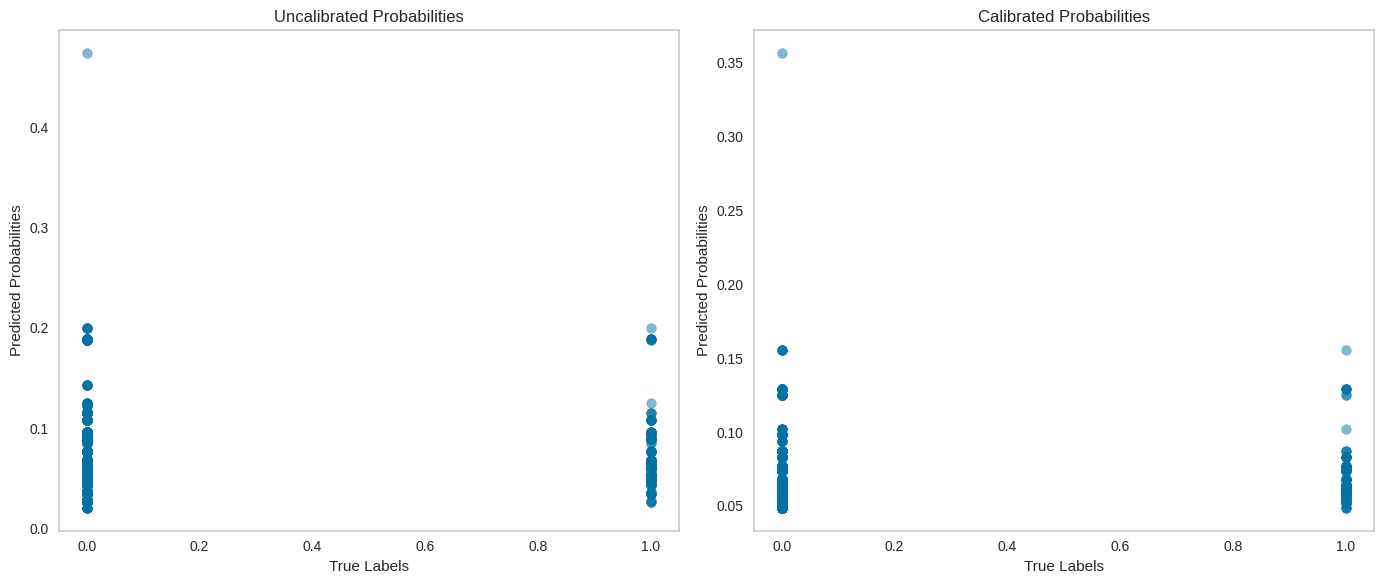

In [177]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_proba_uncalibrated[:, 1], alpha=0.5)
plt.title('Uncalibrated Probabilities')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_proba_calibrated[:, 1], alpha=0.5)
plt.title('Calibrated Probabilities')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.grid()

plt.tight_layout()
plt.show()

Se calibró el modelo usando el método sigmoid y brier score loss antes es de 0.05512 y luego de la calibración disminuyó a 0.05511 por lo que mejoró el modelo mínimamente.